In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "keySize_linear_1_10_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("keySize"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,tenancy
0,0,0,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,180.6,30.4,156.2,220.5,0.0,0.1,dedicated
19,19,19,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,77.1,13.2,49.8,96.0,0.0,0.1,dedicated
18,18,18,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,190.8,9.9,171.9,215.5,0.0,0.1,dedicated
17,17,17,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,192.3,20.6,171.9,222.1,0.0,0.1,dedicated
16,16,16,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,77.0,14.7,54.8,96.1,0.0,0.1,dedicated
15,15,15,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,78.1,13.8,54.8,96.6,0.0,0.1,dedicated
13,13,13,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,174.5,13.5,156.2,203.6,0.0,0.1,dedicated
12,12,12,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,76.3,8.0,49.8,95.5,0.0,0.1,dedicated
11,11,11,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,77.8,8.2,54.8,96.3,0.0,0.1,dedicated
10,10,10,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,173.5,22.6,142.0,214.3,0.0,0.1,dedicated


### Predicting Avg. Read Latency

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+------+------+------+------+-------+------+------+--------+-------+
|   False   |  lr  | knn  |  rf  | svm  | svm_k |  nn  | best | oracle | naive |
+-----------+------+------+------+------+-------+------+------+--------+-------+
| memcached | 44.4 | 45.1 | 42.9 | 37.3 |  37.3 | 46.6 | 37.3 |  36.1  |  51.4 |
+-----------+------+------+------+------+-------+------+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+------+------+------+------+------+------+------+------+------+------+
| App/RMSRE(%) | 1.0  | 2.0  | 3.0  | 4.0  | 5.0  | 6.0  | 7.0  | 8.0  | 9.0  | 10.0 |
+--------------+------+------+------+------+------+------+------+------+------+------+
|  memcached   | 31.3 | 41.5 | 35.7 | 35.1 | 35.2 | 38.0 | 31.4 | 34.7 | 39.0 | 38.8 |
+--------------+------+------+------+------+------+------+------+------+------+--

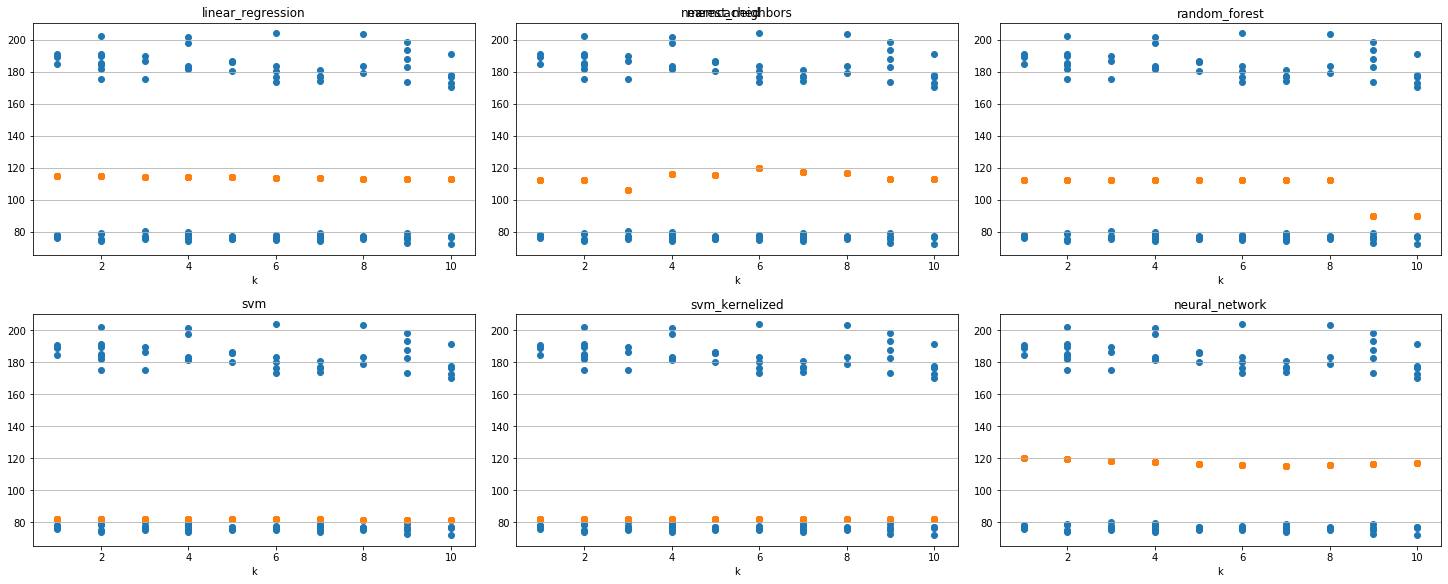

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

### Predicting TX Goodput

In [10]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "tx_goodput"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+------+------+------+------+-------+------+------+--------+-------+
|   False   |  lr  | knn  |  rf  | svm  | svm_k |  nn  | best | oracle | naive |
+-----------+------+------+------+------+-------+------+------+--------+-------+
| memcached | 24.5 | 24.5 | 24.5 | 24.5 |  24.5 | 24.5 | 24.5 |  21.3  |  28.0 |
+-----------+------+------+------+------+-------+------+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+------+------+------+------+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 | 6.0  | 7.0  | 8.0  | 9.0  | 10.0 |
+--------------+-----+-----+-----+-----+-----+------+------+------+------+------+
|  memcached   | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 | 21.7 | 33.3 | 33.2 | 31.6 | 30.4 |
+--------------+-----+-----+-----+-----+-----+------+------+------+------+------+


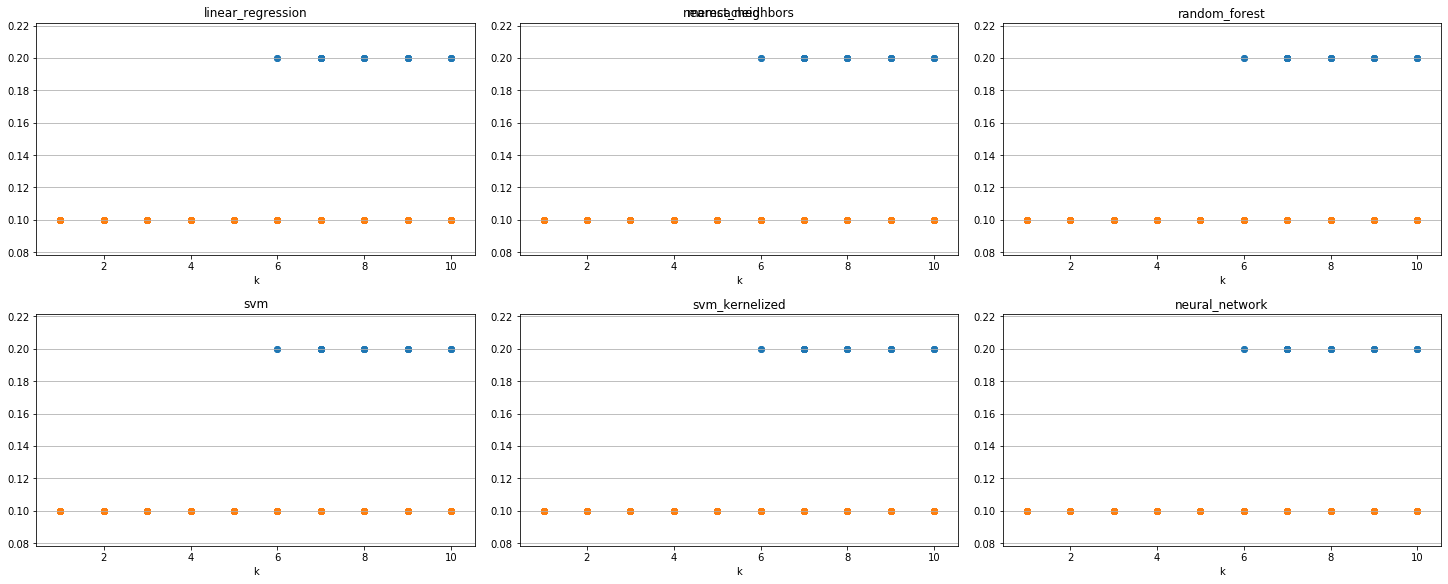

In [11]:
results = dataset_tool.best_case_eval(ctx, {"memcached": df})